In [ ]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sb
import pandas as pd
import numpy as np
import tensorflow as tf
from IPython.display import display

In [2]:
pd.set_option('display.max_rows', 15)
pd.set_option('display.max_columns', 30)

In [ ]:
store = pd.read_csv('store.csv')
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [4]:
display(store.head(), train.head(), test.head())


,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0
1,2,3,4,2015-09-17,1.0,1,0,0
2,3,7,4,2015-09-17,1.0,1,0,0
3,4,8,4,2015-09-17,1.0,1,0,0
4,5,9,4,2015-09-17,1.0,1,0,0


In [5]:
print('Earliest Training Data Entry Date:', min(train.Date))
print('Latest Training Data Entry Date:', max(train.Date))

Earliest Training Data Entry Date: 2013-01-01
Latest Training Data Entry Date: 2015-07-31


In [6]:
print('Earliest Testing Data Entry Date:', min(test.Date))
print('Latest Testing Data Entry Date:', max(test.Date))

Earliest Testing Data Entry Date: 2015-08-01
Latest Testing Data Entry Date: 2015-09-17


In [7]:
display(train.isnull().sum(), test.isnull().sum(), store.isnull().sum())

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

Id                0
Store             0
DayOfWeek         0
Date              0
Open             11
Promo             0
StateHoliday      0
SchoolHoliday     0
dtype: int64

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

Replacing Missing Values (Test Data)

In [8]:
test.loc[test.isna().any(axis=1)]

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
479,480,622,4,2015-09-17,NaN,1,0,0
1335,1336,622,3,2015-09-16,NaN,1,0,0
2191,2192,622,2,2015-09-15,NaN,1,0,0
3047,3048,622,1,2015-09-14,NaN,1,0,0
4759,4760,622,6,2015-09-12,NaN,0,0,0
5615,5616,622,5,2015-09-11,NaN,0,0,0
6471,6472,622,4,2015-09-10,NaN,0,0,0
7327,7328,622,3,2015-09-09,NaN,0,0,0
8183,8184,622,2,2015-09-08,NaN,0,0,0
9039,9040,622,1,2015-09-07,NaN,0,0,0


In [9]:
test_subset = test[test['Store'] == 622]
test_subset.describe()

,Id,Store,DayOfWeek,Open,Promo,SchoolHoliday
count,48.0,48.0,48.000000,37.000000,48.000000,48.000000
mean,20596.0,622.0,3.979167,0.810811,0.395833,0.416667
std,11984.0,0.0,2.036785,0.397061,0.494204,0.498224
min,480.0,622.0,1.000000,0.000000,0.000000,0.000000
25%,10538.0,622.0,2.000000,1.000000,0.000000,0.000000
50%,20596.0,622.0,4.000000,1.000000,0.000000,0.000000
75%,30654.0,622.0,6.000000,1.000000,1.000000,1.000000
max,40712.0,622.0,7.000000,1.000000,1.000000,1.000000


In [10]:
store_622 = [[], [], [], [], [], [], []]
for i in range(7):
    store_622[i].append(i + 1)
    store_622[i].append(test_subset[(test_subset['DayOfWeek'] == i + 1) & (test_subset['Open'] == 0.0)].shape[0])
    store_622[i].append(test_subset[(test_subset['DayOfWeek'] == i + 1) & (test_subset['Open'] == 1.0)].shape[0])
    store_622[i].append(test_subset[(test_subset['DayOfWeek'] == i + 1)].shape[0])
    store_622[i].append(store_622[i][3] - (store_622[i][1] + store_622[i][2]))

test_subset = pd.DataFrame(store_622, columns=['DayOfWeek', 'StoreClosed', 'StoreOpen', 'Total', 'Missing'])

In [11]:
print(test_subset)

   DayOfWeek  StoreClosed  StoreOpen  Total  Missing
0          1            0          5      7        2
1          2            0          5      7        2
2          3            0          5      7        2
3          4            0          5      7        2
4          5            0          5      6        1
5          6            0          5      7        2
6          7            7          0      7        0


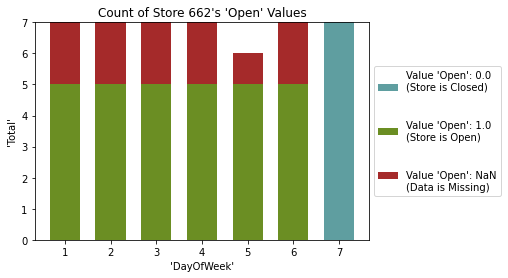

In [12]:
fig, ax = plt.subplots()

ax.bar(test_subset['DayOfWeek'], test_subset['StoreClosed'], 0.66,
       label="Value 'Open': 0.0\n(Store is Closed)\n", color='cadetblue')
ax.bar(test_subset['DayOfWeek'], test_subset['StoreOpen'], 0.66, bottom=test_subset['StoreClosed'], label="\nValue 'Open': 1.0\n(Store is Open)\n",
       color='olivedrab')
ax.bar(test_subset['DayOfWeek'], test_subset['Missing'], 0.66, bottom=np.array(test_subset['StoreClosed'])+np.array(test_subset['StoreOpen']),
       label="\nValue 'Open': NaN\n(Data is Missing)", color='brown')

ax.set_xlabel("'DayOfWeek'")
ax.set_ylabel("'Total'")
ax.set_title("Count of Store 662's 'Open' Values")
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()

In [13]:
test['Open'] = test['Open'].fillna(1.0)
test.isnull().sum()

Id               0
Store            0
DayOfWeek        0
Date             0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

Replacing Missing Values (Store Data)

In [14]:
store.describe()

,Store,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1115.00000,1112.000000,761.000000,761.000000,1115.000000,571.000000,571.000000
mean,558.00000,5404.901079,7.224704,2008.668857,0.512108,23.595447,2011.763573
std,322.01708,7663.174720,3.212348,6.195983,0.500078,14.141984,1.674935
min,1.00000,20.000000,1.000000,1900.000000,0.000000,1.000000,2009.000000
25%,279.50000,717.500000,4.000000,2006.000000,0.000000,13.000000,2011.000000
50%,558.00000,2325.000000,8.000000,2010.000000,1.000000,22.000000,2012.000000
75%,836.50000,6882.500000,10.000000,2013.000000,1.000000,37.000000,2013.000000
max,1115.00000,75860.000000,12.000000,2015.000000,1.000000,50.000000,2015.000000


In [15]:
store.loc[store['CompetitionDistance'].isnull(), ['CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear']] = 0
store.loc[store['CompetitionDistance'].isnull(), ['CompetitionDistance']] = store['CompetitionDistance'].std()

store['CompetitionOpenSinceMonth'] = store['CompetitionOpenSinceMonth'].fillna(store['CompetitionOpenSinceMonth'].mean()).apply(np.floor)
store['CompetitionOpenSinceYear'] = store['CompetitionOpenSinceYear'].fillna(store['CompetitionOpenSinceYear'].mean()).apply(np.floor)

store.isnull().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            0
CompetitionOpenSinceMonth      0
CompetitionOpenSinceYear       0
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

In [16]:
store['Promo2SinceWeek'] = store['Promo2SinceWeek'].fillna(0)
store['Promo2SinceYear'] = store['Promo2SinceYear'].fillna(0)
store['PromoInterval'] = store['PromoInterval'].fillna("None")

store.isnull().sum()

Store                        0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64

Correcting Unique Categorical Values

In [17]:
display(train['StateHoliday'].unique(), test['StateHoliday'].unique(),
        store['StoreType'].unique(), store['Assortment'].unique())

array(['0', 'a', 'b', 'c', 0], dtype=object)

array(['0', 'a'], dtype=object)

array(['c', 'a', 'd', 'b'], dtype=object)

array(['a', 'c', 'b'], dtype=object)

In [18]:
train["StateHoliday"].replace({'0': 0, 'a': 1, 'b': 2, 'c': 3}, inplace=True)
test["StateHoliday"].replace({'0': 0, 'a': 1, 'b': 2, 'c': 3}, inplace=True)
store["StoreType"].replace({'a': 1, 'b': 2, 'c': 3, 'd': 4}, inplace=True)
store["Assortment"].replace({'a': 1, 'b': 2, 'c': 3}, inplace=True)

display(train['StateHoliday'].unique(), test['StateHoliday'].unique(),
        store['StoreType'].unique(), store['Assortment'].unique())

array([0, 1, 2, 3])

array([0, 1])

array([3, 1, 4, 2])

array([1, 3, 2])

Merging Train & Test with Store

In [19]:
full_train = train.merge(store, on='Store', how='inner')
full_test = test.merge(store, on='Store', how='inner')

display(full_train.head(), full_test.head())

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,3,1,1270.0,9.0,2008.0,0,0.0,0.0,None
1,1,4,2015-07-30,5020,546,1,1,0,1,3,1,1270.0,9.0,2008.0,0,0.0,0.0,None
2,1,3,2015-07-29,4782,523,1,1,0,1,3,1,1270.0,9.0,2008.0,0,0.0,0.0,None
3,1,2,2015-07-28,5011,560,1,1,0,1,3,1,1270.0,9.0,2008.0,0,0.0,0.0,None
4,1,1,2015-07-27,6102,612,1,1,0,1,3,1,1270.0,9.0,2008.0,0,0.0,0.0,None


,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,1,4,2015-09-17,1.0,1,0,0,3,1,1270.0,9.0,2008.0,0,0.0,0.0,None
1,857,1,3,2015-09-16,1.0,1,0,0,3,1,1270.0,9.0,2008.0,0,0.0,0.0,None
2,1713,1,2,2015-09-15,1.0,1,0,0,3,1,1270.0,9.0,2008.0,0,0.0,0.0,None
3,2569,1,1,2015-09-14,1.0,1,0,0,3,1,1270.0,9.0,2008.0,0,0.0,0.0,None
4,3425,1,7,2015-09-13,0.0,0,0,0,3,1,1270.0,9.0,2008.0,0,0.0,0.0,None


Creating Columns to Correctly Assign Competition Distance & Promo2 Status Using Dates

In [20]:
full_train[["Year", "Month", "Day"]] = full_train["Date"].str.split("-", expand=True)
full_test[["Year", "Month", "Day"]] = full_test["Date"].str.split("-", expand=True)

In [21]:
full_train["Year"] = pd.to_numeric(full_train["Year"]).astype(int)
full_train["Month"] = pd.to_numeric(full_train["Month"]).astype(int)
full_train["Day"] = pd.to_numeric(full_train["Day"]).astype(int)

full_test["Year"] = pd.to_numeric(full_test["Year"]).astype(int)
full_test["Month"] = pd.to_numeric(full_test["Month"]).astype(int)
full_test["Day"] = pd.to_numeric(full_test["Day"]).astype(int)

In [22]:
display(full_train.head(), full_test.head())

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,Day
0,1,5,2015-07-31,5263,555,1,1,0,1,3,1,1270.0,9.0,2008.0,0,0.0,0.0,None,2015,7,31
1,1,4,2015-07-30,5020,546,1,1,0,1,3,1,1270.0,9.0,2008.0,0,0.0,0.0,None,2015,7,30
2,1,3,2015-07-29,4782,523,1,1,0,1,3,1,1270.0,9.0,2008.0,0,0.0,0.0,None,2015,7,29
3,1,2,2015-07-28,5011,560,1,1,0,1,3,1,1270.0,9.0,2008.0,0,0.0,0.0,None,2015,7,28
4,1,1,2015-07-27,6102,612,1,1,0,1,3,1,1270.0,9.0,2008.0,0,0.0,0.0,None,2015,7,27


,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,Day
0,1,1,4,2015-09-17,1.0,1,0,0,3,1,1270.0,9.0,2008.0,0,0.0,0.0,None,2015,9,17
1,857,1,3,2015-09-16,1.0,1,0,0,3,1,1270.0,9.0,2008.0,0,0.0,0.0,None,2015,9,16
2,1713,1,2,2015-09-15,1.0,1,0,0,3,1,1270.0,9.0,2008.0,0,0.0,0.0,None,2015,9,15
3,2569,1,1,2015-09-14,1.0,1,0,0,3,1,1270.0,9.0,2008.0,0,0.0,0.0,None,2015,9,14
4,3425,1,7,2015-09-13,0.0,0,0,0,3,1,1270.0,9.0,2008.0,0,0.0,0.0,None,2015,9,13


In [23]:
full_train["CompetitionDistance"] = full_train["CompetitionDistance"].where((full_train["CompetitionOpenSinceYear"] < full_train["Year"]) & (
    full_train["CompetitionOpenSinceMonth"] < full_train["Month"]), full_train["CompetitionDistance"] * full_train["CompetitionDistance"].std())
full_test["CompetitionDistance"] = full_test["CompetitionDistance"].where((full_test["CompetitionOpenSinceYear"] < full_test["Year"]) & (
    full_test["CompetitionOpenSinceMonth"] < full_test["Month"]), full_test["CompetitionDistance"] * full_test["CompetitionDistance"].std())

In [24]:
full_train["CompetitionDistance"] = (full_train["CompetitionDistance"] - full_train["CompetitionDistance"].min()) / (
    full_train["CompetitionDistance"].max() - full_train["CompetitionDistance"].min())

full_test["CompetitionDistance"] = (full_test["CompetitionDistance"] - full_test["CompetitionDistance"].min()) / (
    full_test["CompetitionDistance"].max() - full_test["CompetitionDistance"].min())

In [25]:
month_to_str = {1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May',
                6: 'Jun', 7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'}
days = {'Jan': 0, 'Feb': 31, 'Mar': 59, 'Apr': 90, 'May': 120, 'Jun': 151,
        'Jul': 181, 'Aug': 212, 'Sep': 243, 'Oct': 273, 'Nov': 304, 'Dec': 334}

full_train["LeapYear"] = 1
full_train["LeapYear"] = full_train["LeapYear"].where((full_train["Year"] % 4 == 0) & (full_train["Year"] % 100 == 0) & (full_train["Year"] % 400 == 0), 0)

full_test["LeapYear"] = 1
full_test["LeapYear"] = full_test["LeapYear"].where((full_test["Year"] % 4 == 0) & (full_test["Year"] % 100 == 0) & (full_test["Year"] % 400 == 0), 0)

In [26]:
full_train["MonthStr"] = full_train["Month"].replace(month_to_str)
full_train["Week"] = full_train["MonthStr"].replace(days)
full_train["Week"] = full_train["Week"].where((full_train["Month"] == 1) | (full_train["Month"] == 2) | (full_train["LeapYear"] != 1), full_train["Week"] + 1)
full_train["Week"] = ((full_train["Week"] + full_train["Day"])/7).apply(np.floor).astype(int)

full_test["MonthStr"] = full_test["Month"].replace(month_to_str)
full_test["Week"] = full_test["MonthStr"].replace(days)
full_test["Week"] = full_test["Week"].where((full_test["Month"] == 1) | (full_test["Month"] == 2) | (full_test["LeapYear"] != 1), full_test["Week"] + 1)
full_test["Week"] = ((full_test["Week"] + full_test["Day"])/7).apply(np.floor).astype(int)

In [27]:
full_train["Promo2Month"] = 1
full_train["Promo2Month"] = full_train["Promo2Month"].where(full_train.apply(lambda x: x.MonthStr in x.PromoInterval, axis=1), 0).astype(int)
full_train["Promo2Active"] = 1
full_train["Promo2Active"] = full_train["Promo2Active"].where((full_train["Promo2SinceYear"] < full_train["Year"]) & (full_train["Promo2SinceWeek"] < full_train["Week"]) & (full_train["Promo2Month"] == 1), 0).astype(int)

full_test["Promo2Month"] = 1
full_test["Promo2Month"] = full_test["Promo2Month"].where(full_test.apply(lambda x: x.MonthStr in x.PromoInterval, axis=1), 0).astype(int)
full_test["Promo2Active"] = 1
full_test["Promo2Active"] = full_test["Promo2Active"].where((full_test["Promo2SinceYear"] < full_test["Year"]) & (full_test["Promo2SinceWeek"] < full_test["Week"]) & (full_test["Promo2Month"] == 1), 0).astype(int)

In [28]:
full_train["Promo"] = full_train["Promo"].where(full_train["Promo"] == 1, full_train["Promo2Active"])
full_test["Promo"] = full_test["Promo"].where(full_test["Promo"] == 1, full_test["Promo2Active"])

Organising Columns

In [29]:
# full_train = full_train[['Sales', 'Store', 'StoreType', 'Assortment', 'Open', 'Customers',
#                          'DayOfWeek', 'Date', 'Year', 'LeapYear', 'Month', 'MonthStr', 'Week', 'Day',
#                          'CompetitionDistance', 'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear',
#                          'Promo', 'Promo2', 'Promo2Active', 'Promo2Month', 'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval',
#                          'StateHoliday', 'SchoolHoliday']]

# full_test = full_test[['Id', 'Store', 'StoreType', 'Assortment', 'Open',
#                        'DayOfWeek', 'Date', 'Year', 'LeapYear', 'Month', 'MonthStr', 'Week', 'Day',
#                        'CompetitionDistance', 'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear',
#                        'Promo', 'Promo2', 'Promo2Active', 'Promo2Month', 'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval',
#                        'StateHoliday', 'SchoolHoliday']]

In [30]:
display(full_train.head(), full_test.head())

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,Day,LeapYear,MonthStr,Week,Promo2Month,Promo2Active
0,1,5,2015-07-31,5263,555,1,1,0,1,3,1,0.016741,9.0,2008.0,0,0.0,0.0,None,2015,7,31,0,Jul,30,0,0
1,1,4,2015-07-30,5020,546,1,1,0,1,3,1,0.016741,9.0,2008.0,0,0.0,0.0,None,2015,7,30,0,Jul,30,0,0
2,1,3,2015-07-29,4782,523,1,1,0,1,3,1,0.016741,9.0,2008.0,0,0.0,0.0,None,2015,7,29,0,Jul,30,0,0
3,1,2,2015-07-28,5011,560,1,1,0,1,3,1,0.016741,9.0,2008.0,0,0.0,0.0,None,2015,7,28,0,Jul,29,0,0
4,1,1,2015-07-27,6102,612,1,1,0,1,3,1,0.016741,9.0,2008.0,0,0.0,0.0,None,2015,7,27,0,Jul,29,0,0


,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,Day,LeapYear,MonthStr,Week,Promo2Month,Promo2Active
0,1,1,4,2015-09-17,1.0,1,0,0,3,1,0.031082,9.0,2008.0,0,0.0,0.0,None,2015,9,17,0,Sep,37,0,0
1,857,1,3,2015-09-16,1.0,1,0,0,3,1,0.031082,9.0,2008.0,0,0.0,0.0,None,2015,9,16,0,Sep,37,0,0
2,1713,1,2,2015-09-15,1.0,1,0,0,3,1,0.031082,9.0,2008.0,0,0.0,0.0,None,2015,9,15,0,Sep,36,0,0
3,2569,1,1,2015-09-14,1.0,1,0,0,3,1,0.031082,9.0,2008.0,0,0.0,0.0,None,2015,9,14,0,Sep,36,0,0
4,3425,1,7,2015-09-13,0.0,0,0,0,3,1,0.031082,9.0,2008.0,0,0.0,0.0,None,2015,9,13,0,Sep,36,0,0


End of Pre-Processing

In [31]:
training = full_train
testing = full_test

training['DayOfWeek'] = training['DayOfWeek'].replace({1: '0,0,0,0,0,0,1', 2: '0,0,0,0,0,1,0', 3: '0,0,0,0,1,0,0', 4: '0,0,0,1,0,0,0',
                                                       5: '0,0,1,0,0,0,0', 6: '0,1,0,0,0,0,0', 7: '1,0,0,0,0,0,0'})

testing['DayOfWeek'] = testing['DayOfWeek'].replace({1: '0,0,0,0,0,0,1', 2: '0,0,0,0,0,1,0', 3: '0,0,0,0,1,0,0', 4: '0,0,0,1,0,0,0',
                                                       5: '0,0,1,0,0,0,0', 6: '0,1,0,0,0,0,0', 7: '1,0,0,0,0,0,0'})


training['StoreType'] = training['StoreType'].replace({1 : '0,0,0,1', 2: '0,0,1,0', 3 : '0,1,0,0', 4 : '1,0,0,0'})
training['Assortment'] = training['Assortment'].replace({1 : '0,0,1', 2 : '0,1,0', 3 : '1,0,0'})
training['StateHoliday'] = training['StateHoliday'].replace({0 : '0,0,0', 1 : '0,0,1', 2 : '0,1,0', 3 : '1,0,0'})

testing['StoreType'] = testing['StoreType'].replace({1 : '0,0,0,1', 2: '0,0,1,0', 3 : '0,1,0,0', 4 : '1,0,0,0'})
testing['Assortment'] = testing['Assortment'].replace({1 : '0,0,1', 2 : '0,1,0', 3 : '1,0,0'})
testing['StateHoliday'] = testing['StateHoliday'].replace({0 : '0,0,0', 1 : '0,0,1', 2 : '0,1,0', 3 : '1,0,0'})


training["DayOfWeek"] = training["DayOfWeek"].str.split(",")
training["StoreType"] = training["StoreType"].str.split(",")
training["Assortment"] = training["Assortment"].str.split(",")
training["StateHoliday"] = training["StateHoliday"].str.split(",")

testing["DayOfWeek"] = testing["DayOfWeek"].str.split(",")
testing["StoreType"] = testing["StoreType"].str.split(",")
testing["Assortment"] = testing["Assortment"].str.split(",")
testing["StateHoliday"] = testing["StateHoliday"].str.split(",")


training[['DayOfWeek7', 'DayOfWeek6', 'DayOfWeek5', 'DayOfWeek4', 'DayOfWeek3', 'DayOfWeek2', 'DayOfWeek1']] = pd.DataFrame(training["DayOfWeek"].tolist(), index=training.index)
training[['StoreType4', 'StoreType3','StoreType2', 'StoreType1']] = pd.DataFrame(training["StoreType"].tolist(), index=training.index)
training[['Assortment3','Assortment2', 'Assortment1']] = pd.DataFrame(training["Assortment"].tolist(), index = training.index)
training[['StateHoliday3','StateHoliday2', 'StateHoliday1']] = pd.DataFrame(training["StateHoliday"].tolist(), index = training.index)

testing[['DayOfWeek7', 'DayOfWeek6', 'DayOfWeek5', 'DayOfWeek4', 'DayOfWeek3', 'DayOfWeek2', 'DayOfWeek1']] = pd.DataFrame(testing["DayOfWeek"].tolist(), index=testing.index)
testing[['StoreType4', 'StoreType3','StoreType2', 'StoreType1']] = pd.DataFrame(testing["StoreType"].tolist(), index=testing.index)
testing[['Assortment3','Assortment2', 'Assortment1']] = pd.DataFrame(testing["Assortment"].tolist(), index = testing.index)
testing[['StateHoliday3','StateHoliday2', 'StateHoliday1']] = pd.DataFrame(testing["StateHoliday"].tolist(), index = testing.index)


training = training.drop(["Customers", "Date", "Day", "Promo2", "Promo2SinceYear", "PromoInterval", "LeapYear", "MonthStr", "Week", "Promo2Month", "CompetitionOpenSinceMonth", "CompetitionOpenSinceYear", "Promo2SinceWeek", "StoreType", "Assortment", "StateHoliday", "DayOfWeek", "Year", "Month"], axis='columns')
testing = testing.drop(["Date", "Day", "Promo2", "Promo2SinceYear", "PromoInterval", "LeapYear", "MonthStr", "Week", "Promo2Month", "CompetitionOpenSinceMonth", "CompetitionOpenSinceYear", "Promo2SinceWeek", "StoreType", "Assortment", "StateHoliday", "DayOfWeek", "Year", "Month"], axis='columns')

In [32]:
Y = training.pop('Sales')
X = training
print(X.shape)
X = np.resize(X,(X.shape[0],1,X.shape[1])).astype(float)
print(X.shape)

(1017209, 23)
(1017209, 1, 23)


In [35]:
model =  tf.keras.models.Sequential()
model.add(tf.keras.Input([1, X.shape[2]]))
model.add(tf.keras.layers.LSTM(128, return_sequences = True))
model.add(tf.keras.layers.LSTM(64, return_sequences = True))
model.add(tf.keras.layers.LSTM(64, return_sequences = True))
model.add(tf.keras.layers.Dense(64))
model.add(tf.keras.layers.Dense(1))

model.compile(loss='mean_squared_error', optimizer='rmsprop', metrics=['mean_absolute_error'])
#es = tf.keras.callbacks.EarlyStopping(monitor='loss', mode='min', verbose=1)
model.fit(X, Y, batch_size = 169, epochs=4)

2021-12-13 00:56:13.889052: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 93583228 exceeds 10% of free system memory.


Epoch 1/4
6019/6019 [==============================] - 104s 16ms/step - loss: 12393605.0000 - mean_absolute_error: 2379.4128
Epoch 2/4
6019/6019 [==============================] - 97s 16ms/step - loss: 6503867.0000 - mean_absolute_error: 1688.1207
Epoch 3/4
6019/6019 [==============================] - 101s 17ms/step - loss: 6238664.0000 - mean_absolute_error: 1650.1760
Epoch 4/4
6019/6019 [==============================] - 106s 18ms/step - loss: 6094862.0000 - mean_absolute_error: 1630.2386


In [36]:
predicted_df = pd.DataFrame(columns=['Id', 'Sales'])
predicted_df["Id"] = testing.pop('Id')
X_test = testing
X_test = np.resize(X_test, (X_test.shape[0], 1, X_test.shape[1])).astype(float)
predicted = model.predict(X_test)
print(predicted.shape)

(41088, 1)


In [37]:
print(predicted_df)

          Id Sales
0          1   NaN
1        857   NaN
2       1713   NaN
3       2569   NaN
4       3425   NaN
...      ...   ...
41083  37664   NaN
41084  38520   NaN
41085  39376   NaN
41086  40232   NaN
41087  41088   NaN

[41088 rows x 2 columns]


In [38]:
new_out = predicted.reshape(predicted.shape[0])
print(new_out.shape)

(41088,)


In [39]:
predicted_df["Sales"] = new_out
predicted_df.head()

,Id,Sales
0,1,4863.757812
1,857,5107.052734
2,1713,5215.337891
3,2569,5750.826172
4,3425,0.000000


In [40]:
predicted_df = predicted_df.sort_values(['Id'], ascending=True)
predicted_df.head()

,Id,Sales
0,1,4863.757812
48,2,6939.235352
96,3,8683.372070
144,4,5585.788086
192,5,8264.127930


In [42]:
predicted_df.to_csv('submission.csv', encoding='utf-8', index=False)